In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# 1) Imported Data

### 1.1- Imported and clean data related to personal income

In [4]:
df_inc=pd.read_csv('SQINC4__ALL_AREAS_1948_2023.csv')

# Select rows related to Personal income
df_inc1=df_inc[df_inc.Description=='Personal income (millions of dollars, seasonally adjusted) ']
df_inc1=df_inc1.reset_index()
df_inc1.head(3)

,index,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1948:Q1,...,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2
0,0,"""00000""",United States,,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,204641.7,...,22147826.5,21031135.9,21124208.1,21268077.5,21395331.0,21640433.8,21995492.2,22249735.0,22618087.4,22857766.7
1,20,"""01000""",Alabama,5,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,2496.0,...,266593.2,245905.6,247487.7,251181.2,252387.8,255728.9,260858.5,264473.5,269220.9,270754.1
2,40,"""02000""",Alaska *,8,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,(NA),...,49925.2,47397.6,47485.1,48023.9,49140.4,50110.1,50838.0,51310.2,51224.5,51779.2


In [5]:
dinc=pd.DataFrame({'States':df_inc1['GeoName'],'Personnal income 2020':df_inc1['2020:Q4']*1000000,'Personnal income 2021':df_inc1['2021:Q4']*1000000,'Personnal income 2022':df_inc1['2022:Q4']*1000000})
dinc=dinc.set_index('States')
dinc.head()

,Personnal income 2020,Personnal income 2021,Personnal income 2022
States,,,
United States,1.969730e+13,2.126808e+13,2.224974e+13
Alabama,2.302868e+11,2.511812e+11,2.644735e+11
Alaska *,4.496160e+10,4.802390e+10,5.131020e+10
Arizona,3.759074e+11,4.108801e+11,4.412585e+11
Arkansas,1.415688e+11,1.547136e+11,1.649914e+11


Some states do not appear in the previous result of data frame merge, because in data frame 'dinc' and asterisk is added to their names, such as Alaska

In [6]:
y=list()
for i in dinc.index:
    if '*' in i:
        y.append(i[:-1])
    else:
        y.append(i)
    
dinc.index=y

### 1.2- Import and clean data related to population

In [7]:
df_pop=pd.read_excel('NST-EST2022-POP.xlsx',header=3,nrows=57) # Source: https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html
df_pop.columns=['States','Estimates base','Population 2020','Population 2021','Population 2022']
df_pop=df_pop.set_index('States')
df_pop.head()

,Estimates base,Population 2020,Population 2021,Population 2022
States,,,,
United States,331449520,331511512,332031554,333287557
Northeast,57609156,57448898,57259257,57040406
Midwest,68985537,68961043,68836505,68787595
South,126266262,126450613,127346029,128716192
West,78588565,78650958,78589763,78743364


There is a dot before States names. I should remove them

In [8]:
z=list()
for i in df_pop.index:
    if '.' in i:
        z.append(i[1:])
    else:
        z.append(i)
    
df_pop.index=z

In [9]:
df_pop.head(6)

,Estimates base,Population 2020,Population 2021,Population 2022
United States,331449520,331511512,332031554,333287557
Northeast,57609156,57448898,57259257,57040406
Midwest,68985537,68961043,68836505,68787595
South,126266262,126450613,127346029,128716192
West,78588565,78650958,78589763,78743364
Alabama,5024356,5031362,5049846,5074296


In [47]:
df=pd.merge(dinc,df_pop,left_index=True,right_index=True)
df['Personnal income 2022 (% population 2022)']=df['Personnal income 2022']/df['Population 2022']
df=df.sort_values('Personnal income 2022 (% population 2022)',ascending=True)
df.tail()

,Personnal income 2020,Personnal income 2021,Personnal income 2022,Estimates base,Population 2020,Population 2021,Population 2022,Personnal income 2022 (% population 2022)
New Jersey,6.654140e+11,7.004611e+11,7.252873e+11,9289031,9271689,9267961,9261699,78310.394238
California,2.813864e+12,2.987528e+12,3.058730e+12,39538245,39501653,39142991,39029342,78370.024788
Connecticut,2.795515e+11,2.922656e+11,3.058822e+11,3605942,3597362,3623355,3626205,84353.256366
Massachusetts,5.467117e+11,5.771815e+11,6.107541e+11,7029949,6995729,6989690,6981974,87475.848521
District of Columbia,6.036360e+10,6.457010e+10,6.594050e+10,689546,670868,668791,671803,98154.518512


### 1.3- Import and clean geographic divisions data

In [48]:

df['Personnal income 2022 (% population 2022)']=df['Personnal income 2022']/df['Population 2022']
df=df.sort_values('Personnal income 2022 (% population 2022)',ascending=True)
df=df.tail(10)

df_geo=pd.read_excel('state-geocodes-v2014_modifyCRL.xlsx',sheet_name='Modify_Raulin')
df_geo=df_geo.set_index('States')
df1=pd.merge(df,df_geo,left_index=True,right_index=True)
# df1.head()

Text(-0.5, -2.2, 'Source: By Raulin L. Cadet, with seasonally adjusted personal income data \nfrom the US Bureau of Economic Analysis and population data from the US \nCensus Bureau.')

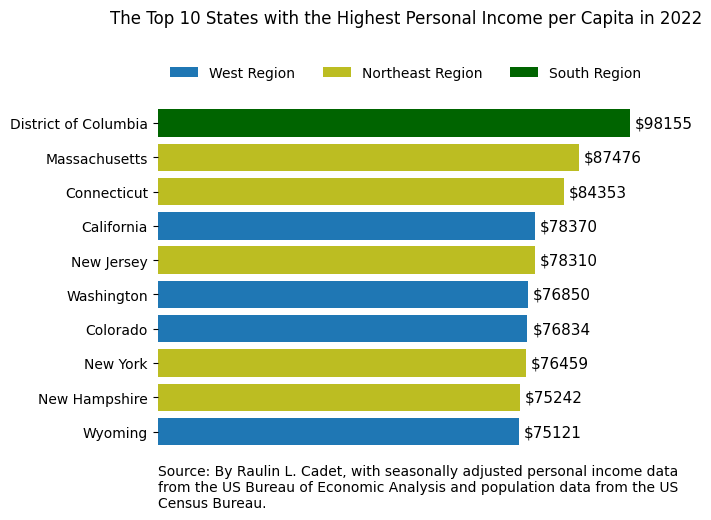

In [49]:
region_colors = {
    'Northeast Region': 'tab:olive',
    'Midwest Region': 'navy',    
    'South Region': 'darkgreen',      
    'West Region': 'tab:blue',       
}

regions=list(set(df1.Region))  # list of regions
colors = [region_colors[region] for region in regions]

fig=plt.subplot()

# Create an empty legend dictionary to store legend handles
legend_dict = {}
for i in range(len(df1.index)):
    if df1.index[i]!='United States':
        myregion=df1.Region[i]
        gbarh=plt.barh(df1.index[i],df1['Personnal income 2022 (% population 2022)'][i],color=region_colors[df1.Region[i]],label=myregion)
        plt.text(df1['Personnal income 2022 (% population 2022)'][i]+1000, i,s='$'+str(round(df1['Personnal income 2022 (% population 2022)'][i])), va='center', fontsize=11, color='black')
        legend_dict[myregion] = gbarh

plt.title('The Top 10 States with the Highest Personal Income per Capita in 2022',pad=50)
# plt.legend(legend_dict.values(), legend_dict.keys(), title="Regions", loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.legend(legend_dict.values(), legend_dict.keys(),  loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4,frameon=False)
fig.spines[['top','right','bottom','left']].set_visible(False)
fig.set_xticks([])  # Remove x-axis ticks
plt.text(-0.5,-2.2,s='Source: By Raulin L. Cadet, with seasonally adjusted personal income data \nfrom the US Bureau of Economic Analysis and population data from the US \nCensus Bureau.')